In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
from PIL import Image

### Get all images and their labels, save to .npz file, and load from it.

In [2]:
def get_all_image(path, saveto):
    """
        Glob all image data, combine and save to np.npz file.
    Args:
        path = "LFW/lfw-deepfunneled/lfw-deepfunneled/"
        saveto = filename (eg. "data")
    Return:
        Filename. eg. "data.npz"
    """
    if os.path.isfile(saveto + ".npz"):     # If npz file already exists
        return saveto + ".npz" 
    img_chunk = []      # All image arrays
    label_chunk = []    # All image labels
    dir_list = glob(path+"/*/", recursive = True)
    for dir in dir_list:
        label = dir.split("/")[-2]      # directory name = label   eg.angry
        image_path_list = glob(dir+"/*", recursive=True)
        for image_path in image_path_list:
            image = Image.open(image_path)
            img_chunk.append(np.array(image))
            label_chunk.append(label)

    img_chunk = np.array(img_chunk)
    label_chunk = np.array(label_chunk)
    np.savez(saveto, image = img_chunk, label = label_chunk)
    return saveto + ".npz"

In [3]:
def load_all_image(npz_path):
    """
        Load data from npz file
    """
    data = np.load(npz_path)
    return data["image"], data["label"]

In [4]:
train_dir = "images/train"
data_loc = get_all_image(train_dir, "train")
images, labels = load_all_image(data_loc)

In [5]:
print(images.shape)
print(labels.shape)

(28821, 48, 48)
(28821,)


### Encode the labels
label_dict: dictionary of labels and their corresponding number

labels_encoded: encoded labels (numbers)

In [6]:
label_dict = {}
i = 0
for label in np.unique(labels):
    label_dict[label] = i
    i += 1

labels_encoded = np.zeros(labels.shape)
for i in range(labels_encoded.shape[0]):
    labels_encoded[i] = label_dict[labels[i]]

print(label_dict)
print(labels_encoded[:10])

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


Show the distribution of labels

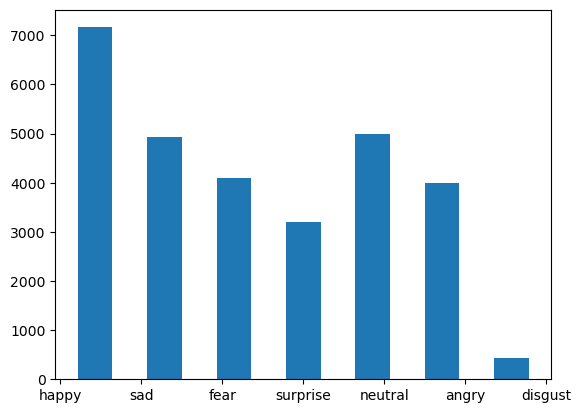

In [7]:
plt.hist(labels, bins=len(label_dict), rwidth=0.5)
plt.show()

Show some random image, converted reversely from the np.array we saved

In [8]:
random_img = images[np.random.choice(images.shape[0])]
img = Image.fromarray(random_img)
img.show()
